In [1]:
#Import the libraries required (pandas, numpy, matplotlib, seaborn)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data0 = pd.read_csv('Clothing_Customers.csv')
data0.head(5)


,income,age,days_since_purchase,annual_spend
0,37453,48,504,4441
1,50775,50,566,4239
2,71047,41,326,5834
3,52239,52,259,5456
4,112343,27,279,1749


In [11]:
#Standardize all the columns

cluster_cols = data0.columns
data_scaled = data0.copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled[cluster_cols] = scaler.fit_transform(data0[cluster_cols])

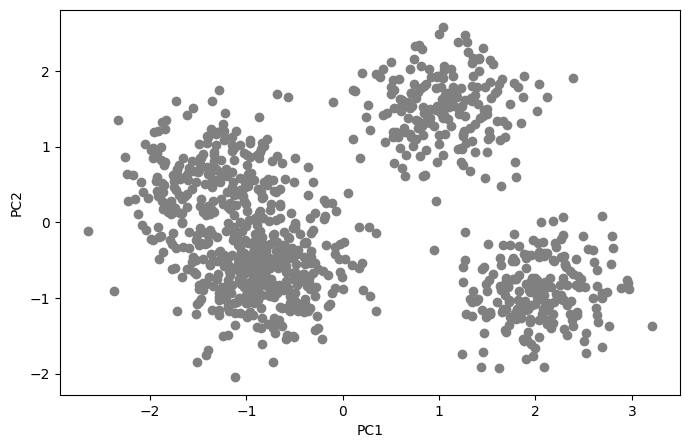

In [13]:
#Visualize the data, use PCA to reduce to two dimensions

from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cluster_cols])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]
plt.figure(figsize = [8,5])
plt.scatter(data_scaled.pc1, data_scaled.pc2, color = 'gray')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

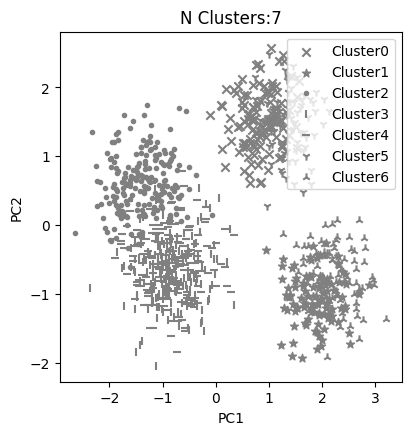

In [15]:
#Kmeans

from sklearn.cluster import KMeans
markers = ['x', '*', '.', '|', '_', '1', '2']

#Using for loop

plt.figure(figsize = [15,10])
for n in range (2,8):
    model = KMeans(n_clusters = n, random_state = 42)
    data_scaled['Cluster'] = model.fit_predict(data_scaled[cluster_cols])
    
plt.subplot(2,3,n-1)
for clust in range(n):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, marker = markers[clust],\
               label = "Cluster"+str(clust), color = 'gray')
    plt.title("N clusters: "+str(n))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.title("N Clusters:" + str(n))

In [7]:
#Determining the Number of Clusters Using the Elbow Method
K=3
model = KMeans(n_clusters = K, random_state = 42)
model.fit(data_scaled[cluster_cols])

KMeans(n_clusters=4, random_state=42)

In [8]:
#Print out the SSE/inertia

print(model.inertia_)

1106.277102288333


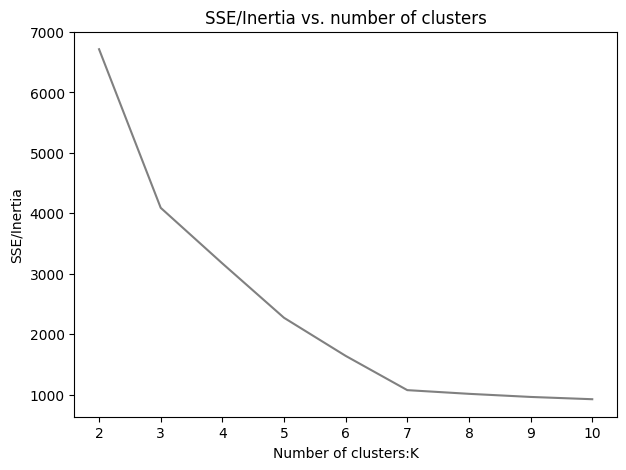

In [16]:
#fit multiple KMeans models

inertia_scores = []
for K in range(2,11):
    inertia = KMeans(n_clusters = K, random_state = 42).fit(data_scaled)\
    .inertia_
    inertia_scores.append(inertia)

#SSE/inertia plot

plt.figure(figsize=[7,5])
plt.plot(range(2,11), inertia_scores, color = 'gray')
plt.title("SSE/Inertia vs. number of clusters")
plt.xlabel("Number of clusters:K")
plt.ylabel('SSE/Inertia')
plt.show()